In [123]:
import psycopg2
from pprint import pprint
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [9]:
# Connect to an existing database
conn = psycopg2.connect("dbname=postgres user=sejaldua")

In [15]:
# preview the dataset
sql = "SELECT * FROM olympics"
master_df = sqlio.read_sql_query(sql, conn)
master_df

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179,89,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NA
271112,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NA
271113,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NA
271114,135571,Tomasz Ireneusz ya,M,30,185,96,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NA


### Number of Athletes Competing over Time

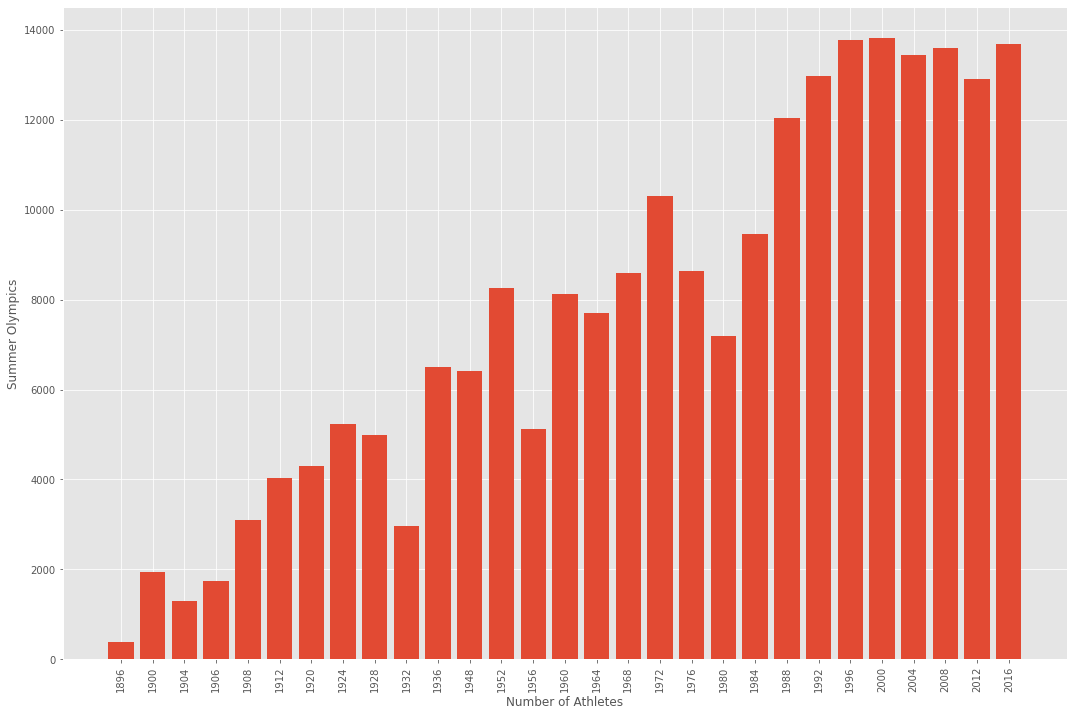

In [62]:
sql = """
SELECT year, COUNT(*) AS num_athletes FROM olympics
WHERE season = 'Summer'
GROUP BY year
"""
df = sqlio.read_sql_query(sql, conn)
# df
plt.figure(figsize=(18,12))
plt.bar(df['year'].astype(str), df['num_athletes'])
plt.ylabel('Summer Olympics')
plt.xlabel('Number of Athletes')
plt.xticks(rotation=90);

### Most Popular Sports by Number of Athletes

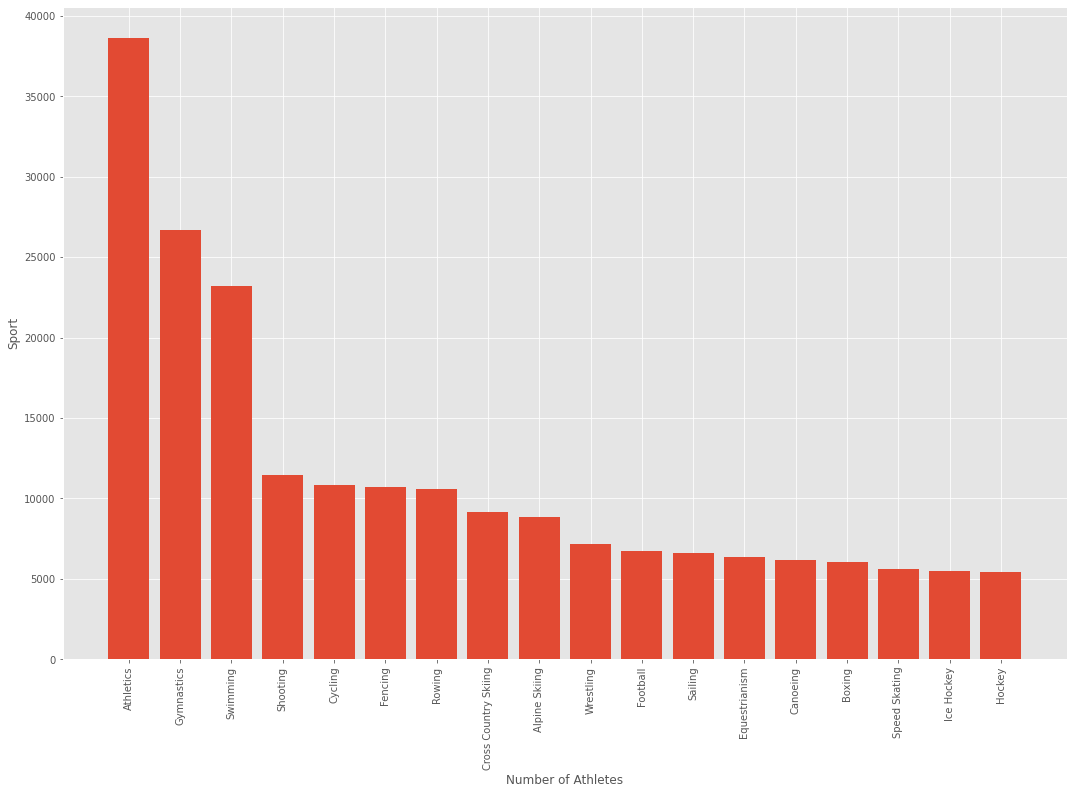

In [71]:
sql = """
SELECT sport, COUNT(*) AS num_athletes FROM olympics
GROUP BY sport
HAVING COUNT(*) > 5000
ORDER BY COUNT(*) DESC
"""
df = sqlio.read_sql_query(sql, conn)
# df
plt.figure(figsize=(18,12))
plt.bar(df['sport'], df['num_athletes'])
plt.ylabel('Sport')
plt.xlabel('Number of Athletes')
plt.xticks(rotation=90);

### Average Gymnast Body Type

In [107]:
# shortest gymnasts
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), noc
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA'
ORDER BY height
LIMIT 10
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,height,weight,noc
0,Rosario Briones,127,42.0,MEX
1,Ana Olvido Manso Gallego,132,31.0,ESP
2,Flvia Lopes Saraiva,133,31.0,BRA
3,Choi Myong-Hui,135,25.0,PRK
4,Jana Labkov (-Valachov),135,34.0,TCH
5,Crystal Gilmore,136,47.0,CAN
6,Liubov Sheremeta,136,30.0,UKR
7,Lu Li,136,30.0,CHN
8,Mariya Yevgenyevna Filatova (-Kurbatova),136,30.0,URS
9,Claudia Fragapane,137,43.0,GBR


In [108]:
# tallest gymnasts
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), noc
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA'
ORDER BY height DESC
LIMIT 10
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,height,weight,noc
0,Arja Vellamo Lehtinen (-Paatsalo),179,62.0,FIN
1,Agata Jadwiga Jaroszek-Karczmarek,178,61.0,POL
2,Bndicte Evrard,176,38.0,BEL
3,Fan Ye,176,72.0,CHN
4,"Sandra Marlene Ruddick (Anderson-, -John)",176,59.0,USA
5,Katarna arisk (-Mulders),174,44.0,TCH
6,Christine Schmitt (-Dressel),172,54.0,GDR
7,Salme Kaarina Koskinen (-Paimander),172,56.0,FIN
8,Marie-Sophie Hindermann,171,51.0,GER
9,Ute Starke (-Kahlenberg),171,49.0,GDR


In [104]:
# HEIGHT STATS
sql = """
SELECT MIN(CAST(height AS INTEGER)), ROUND(AVG(CAST(height AS INTEGER)), 2) AS avg, MAX(CAST(height AS INTEGER))
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA'
"""
df = sqlio.read_sql_query(sql, conn)
df

,min,avg,max
0,127,156.14,179


In [106]:
# WEIGHT STATS
sql = """
SELECT MIN(CAST(weight AS DECIMAL)), ROUND(AVG(CAST(weight AS DECIMAL)), 2) AS avg, MAX(CAST(weight AS DECIMAL))
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND weight <> 'NA'
"""
df = sqlio.read_sql_query(sql, conn)
df

,min,avg,max
0,25.0,47.79,72.0


In [103]:
# AGE STATS
sql = """
SELECT MIN(CAST(age AS INTEGER)), ROUND(AVG(CAST(age AS INTEGER)), 2) AS avg, MAX(CAST(age AS INTEGER))
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND age <> 'NA'
"""
df = sqlio.read_sql_query(sql, conn)
df

,min,avg,max
0,11,19.23,41


In [134]:
sql = """
SELECT noc, COUNT(DISTINCT name) FROM olympics
GROUP BY noc
ORDER BY COUNT(DISTINCT name) DESC
LIMIT 15
"""
df = sqlio.read_sql_query(sql, conn)
df

,noc,count
0,USA,9652
1,GBR,6273
2,FRA,6161
3,ITA,4921
4,GER,4860
5,CAN,4809
6,JPN,4036
7,AUS,3818
8,SWE,3782
9,POL,2964


<AxesSubplot:xlabel='height', ylabel='weight'>

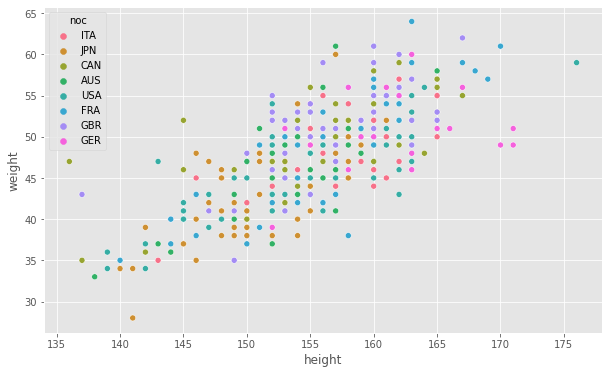

In [138]:
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), noc
FROM olympics
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA' 
AND noc IN
(SELECT noc FROM olympics
GROUP BY noc
ORDER BY COUNT(DISTINCT name) DESC
LIMIT 8)
"""
df = sqlio.read_sql_query(sql, conn)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='height', y='weight', hue='noc')
# plt.show()
# df.plot('height', 'weight', kind='scatter', figsize=(10,6))

In [ ]:
# Close communication with the database
conn.close()